In [1]:
import pandas as pd
import json
import ast
from pprint import pprint

In [2]:
df = pd.read_csv('data/random_tweets.csv')

In [3]:
df

,id,text,context_annotations,entities
0,1537787387975282695,"RT @Mr_AndersonJr: Albert Pike a Freemason, re...",[],"{'annotations': [{'start': 19, 'end': 29, 'pro..."
1,1537787387987861516,@ajaymaurya536 @ZachariaMabala @IsraelGadgets ...,[],"{'mentions': [{'start': 0, 'end': 14, 'usernam..."
2,1537787387991891968,RT @deeptxtings: I wanna be hugged and hugged ...,[],"{'mentions': [{'start': 3, 'end': 15, 'usernam..."
3,1537787387979309059,#Israel is working with #HongKong on a trial w...,"[{'domain': {'id': '30', 'name': 'Entities [En...","{'hashtags': [{'start': 0, 'end': 7, 'tag': 'I..."
4,1537787387996426240,@dxhnvq spill calonnya 😲,[],"{'mentions': [{'start': 0, 'end': 7, 'username..."
...,...,...,...,...
177926,1537870326171852800,RT @bhweingarten: You can't be serious __link__,[],"{'mentions': [{'start': 3, 'end': 16, 'usernam..."
177927,1537870326176043008,RT @starfuryevents: Competition Time! To celeb...,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...","{'annotations': [{'start': 77, 'end': 102, 'pr..."
177928,1537870326163460096,I wish tf I would. I saw that shxt and seen th...,[],"{'urls': [{'start': 126, 'end': 149, 'url': 'h..."
177929,1537870326142537730,RT @Atlacoya5: Friendly reminder from WenZhou:...,"[{'domain': {'id': '172', 'name': 'Global TV S...","{'annotations': [{'start': 38, 'end': 44, 'pro..."


In [4]:
word_phrase_count = df.text.str.split(' ').str.len()

count    177931.000000
mean         15.856017
std           9.804534
min           1.000000
25%           8.000000
50%          14.000000
75%          22.000000
max         101.000000
Name: text, dtype: float64

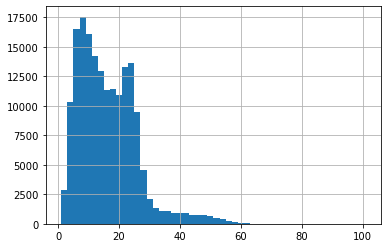

In [5]:
word_phrase_count.hist(bins=50)
word_phrase_count.describe()

In [6]:
ex = df.loc[916]

print(ex.text)
print('___________________________')
entities = ast.literal_eval(ex.entities)
print(json.dumps(entities, sort_keys=False, indent=4))

print('___________________________')
context = ast.literal_eval(ex.context_annotations)
print(json.dumps(context, sort_keys=False, indent=4))

RT @kirawontmiss: Drake better stop hanging around with Jack Harlow because wtf is this
___________________________
{
    "annotations": [
        {
            "start": 18,
            "end": 22,
            "probability": 0.9934,
            "type": "Person",
            "normalized_text": "Drake"
        },
        {
            "start": 56,
            "end": 66,
            "probability": 0.9968,
            "type": "Person",
            "normalized_text": "Jack Harlow"
        }
    ],
    "mentions": [
        {
            "start": 3,
            "end": 16,
            "username": "kirawontmiss",
            "id": "1471414739880189955"
        }
    ]
}
___________________________
[
    {
        "domain": {
            "id": "10",
            "name": "Person",
            "description": "Named people in the world like Nelson Mandela"
        },
        "entity": {
            "id": "1366823673416478722",
            "name": "Jack Harlow"
        }
    },
    {
        "domain"

In [7]:
df.text = df.text.str.replace('__link__','')
df.text = df.text.str.replace('@\w+', '', regex = True)
df.text = df.text.str.replace('RT :', '')
df.text = df.text.str.strip()

In [8]:
df['word_count'] = df.text.apply(lambda x: len(x.split(' ')))
df['word_list'] = df.text.str.split(' ')

In [9]:
df['text'].value_counts().index[1]

"I cannot control my facial expressions😩😩, if you irritate me you'll see it immediately."

In [10]:
aux = df['text'].value_counts()
aux['']

2

In [11]:
len(df['text'].unique())

139033

In [12]:
df[df['id']==1534524466922921987].text == ''

Series([], Name: text, dtype: bool)

In [13]:
df = df.groupby('text').first().reset_index()

In [14]:
df = df.drop(0)
df

,text,id,context_annotations,entities,word_count,word_list
1,! ! HAPPY BIRTHDAY!!!!!🎂🎁🎉🎊🎈,1537864080857649152,[],"{'mentions': [{'start': 0, 'end': 10, 'usernam...",4,"[!, !, HAPPY, BIRTHDAY!!!!!🎂🎁🎉🎊🎈]"
2,! jeongin now joining the crew and his weapon ...,1537860083668832256,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",15,"[!, jeongin, now, joining, the, crew, and, his..."
3,!! interviewed more than 400 people and confi...,1537825048635097088,"[{'domain': {'id': '45', 'name': 'Brand Vertic...","{'hashtags': [{'start': 111, 'end': 121, 'tag'...",17,"[!!, , interviewed, more, than, 400, people, a..."
4,!! ASS TORTURE !! 👠 This Is Called Ass Torture...,1537837652522651649,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",23,"[!!, ASS, TORTURE, !!, 👠, This, Is, Called, As..."
5,!! NEED FOR HELP!! Im a victim of domestic abu...,1537845005129326592,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",25,"[!!, NEED, FOR, HELP!!, Im, a, victim, of, dom..."
...,...,...,...,...,...,...
139028,🫶 Kue Lapis Nct Dream,1537834573916086273,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",5,"[🫶, Kue, Lapis, Nct, Dream]"
139029,🫶 My Comfort in the Chaos.. 🌸 #SidharthShukla...,1537854815635927040,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'hashtags': [{'start': 70, 'end': 85, 'tag': ...",11,"[🫶, My, Comfort, in, the, Chaos.., , 🌸, #Sidha..."
139030,"🫶 guys, ini nct dream era apa? gils, their sid...",1537828257290407936,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",13,"[🫶, guys,, ini, nct, dream, era, apa?, gils,, ..."
139031,"🫶 ingat ttp slalu : ℬℯ 𝒦𝒾𝓃𝒹, ℬℯ ℋ𝓊𝓂𝒷𝓁ℯ, ℬℯ 𝓉𝒽ℯ...",1537832359306792966,[],"{'mentions': [{'start': 3, 'end': 14, 'usernam...",12,"[🫶, ingat, ttp, slalu, :, ℬℯ, 𝒦𝒾𝓃𝒹,, ℬℯ, ℋ𝓊𝓂𝒷𝓁..."


In [15]:
df = df[df.word_count >= 3]
df

,text,id,context_annotations,entities,word_count,word_list
1,! ! HAPPY BIRTHDAY!!!!!🎂🎁🎉🎊🎈,1537864080857649152,[],"{'mentions': [{'start': 0, 'end': 10, 'usernam...",4,"[!, !, HAPPY, BIRTHDAY!!!!!🎂🎁🎉🎊🎈]"
2,! jeongin now joining the crew and his weapon ...,1537860083668832256,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",15,"[!, jeongin, now, joining, the, crew, and, his..."
3,!! interviewed more than 400 people and confi...,1537825048635097088,"[{'domain': {'id': '45', 'name': 'Brand Vertic...","{'hashtags': [{'start': 111, 'end': 121, 'tag'...",17,"[!!, , interviewed, more, than, 400, people, a..."
4,!! ASS TORTURE !! 👠 This Is Called Ass Torture...,1537837652522651649,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",23,"[!!, ASS, TORTURE, !!, 👠, This, Is, Called, As..."
5,!! NEED FOR HELP!! Im a victim of domestic abu...,1537845005129326592,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",25,"[!!, NEED, FOR, HELP!!, Im, a, victim, of, dom..."
...,...,...,...,...,...,...
139028,🫶 Kue Lapis Nct Dream,1537834573916086273,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",5,"[🫶, Kue, Lapis, Nct, Dream]"
139029,🫶 My Comfort in the Chaos.. 🌸 #SidharthShukla...,1537854815635927040,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'hashtags': [{'start': 70, 'end': 85, 'tag': ...",11,"[🫶, My, Comfort, in, the, Chaos.., , 🌸, #Sidha..."
139030,"🫶 guys, ini nct dream era apa? gils, their sid...",1537828257290407936,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",13,"[🫶, guys,, ini, nct, dream, era, apa?, gils,, ..."
139031,"🫶 ingat ttp slalu : ℬℯ 𝒦𝒾𝓃𝒹, ℬℯ ℋ𝓊𝓂𝒷𝓁ℯ, ℬℯ 𝓉𝒽ℯ...",1537832359306792966,[],"{'mentions': [{'start': 3, 'end': 14, 'usernam...",12,"[🫶, ingat, ttp, slalu, :, ℬℯ, 𝒦𝒾𝓃𝒹,, ℬℯ, ℋ𝓊𝓂𝒷𝓁..."


In [16]:
#df['text'] = df['text'].str.capitalize()
df['text'] = df['text'].str.encode('ascii', errors='ignore').str.decode('utf-8')
df = df.drop('word_list', axis=1)
df

C:\Users\marci\AppData\Local\Temp\ipykernel_9816\2580234705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.encode('ascii', errors='ignore').str.decode('utf-8')


,text,id,context_annotations,entities,word_count
1,! ! HAPPY BIRTHDAY!!!!!,1537864080857649152,[],"{'mentions': [{'start': 0, 'end': 10, 'usernam...",4
2,! jeongin now joining the crew and his weapon ...,1537860083668832256,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",15
3,!! interviewed more than 400 people and confi...,1537825048635097088,"[{'domain': {'id': '45', 'name': 'Brand Vertic...","{'hashtags': [{'start': 111, 'end': 121, 'tag'...",17
4,"!! ASS TORTURE !! This Is Called Ass Torture,...",1537837652522651649,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",23
5,!! NEED FOR HELP!! Im a victim of domestic abu...,1537845005129326592,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",25
...,...,...,...,...,...
139028,Kue Lapis Nct Dream,1537834573916086273,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",5
139029,My Comfort in the Chaos.. #SidharthShukla |...,1537854815635927040,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'hashtags': [{'start': 70, 'end': 85, 'tag': ...",11
139030,"guys, ini nct dream era apa? gils, their side...",1537828257290407936,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",13
139031,"ingat ttp slalu : , ,",1537832359306792966,[],"{'mentions': [{'start': 3, 'end': 14, 'usernam...",12


In [17]:
df['hashtags'] = df.text.str.findall('#\w+')
df['text'] = df.text.str.replace('#\w+','')
df

C:\Users\marci\AppData\Local\Temp\ipykernel_9816\1505636162.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df.text.str.replace('#\w+','')


,text,id,context_annotations,entities,word_count,hashtags
1,! ! HAPPY BIRTHDAY!!!!!,1537864080857649152,[],"{'mentions': [{'start': 0, 'end': 10, 'usernam...",4,[]
2,! jeongin now joining the crew and his weapon ...,1537860083668832256,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",15,[]
3,!! interviewed more than 400 people and confi...,1537825048635097088,"[{'domain': {'id': '45', 'name': 'Brand Vertic...","{'hashtags': [{'start': 111, 'end': 121, 'tag'...",17,[#Tigrayans]
4,"!! ASS TORTURE !! This Is Called Ass Torture,...",1537837652522651649,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",23,[]
5,!! NEED FOR HELP!! Im a victim of domestic abu...,1537845005129326592,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",25,[]
...,...,...,...,...,...,...
139028,Kue Lapis Nct Dream,1537834573916086273,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",5,[]
139029,My Comfort in the Chaos.. ||,1537854815635927040,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'hashtags': [{'start': 70, 'end': 85, 'tag': ...",11,"[#SidharthShukla, #SidHearts]"
139030,"guys, ini nct dream era apa? gils, their side...",1537828257290407936,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",13,[]
139031,"ingat ttp slalu : , ,",1537832359306792966,[],"{'mentions': [{'start': 3, 'end': 14, 'usernam...",12,[]


In [24]:
# ()
df.text = df.text.str.extract('(\w.*)')
df.text = df.text.str.replace('#', '')
df.text = df.text.str.strip()
df.text = df.text.str.capitalize()
df = df[~df.text.isnull()]
df

,text,id,context_annotations,entities,word_count,hashtags
1,Happy birthday!!!!!,1537864080857649152,[],"{'mentions': [{'start': 0, 'end': 10, 'usernam...",4,[]
2,Jeongin now joining the crew and his weapon is...,1537860083668832256,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'urls': [{'start': 67, 'end': 90, 'url': 'htt...",15,[]
3,Interviewed more than 400 people and confirmed...,1537825048635097088,"[{'domain': {'id': '45', 'name': 'Brand Vertic...","{'hashtags': [{'start': 111, 'end': 121, 'tag'...",17,[#Tigrayans]
4,"Ass torture !! this is called ass torture, wh...",1537837652522651649,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",23,[]
5,Need for help!! im a victim of domestic abuse ...,1537845005129326592,[],"{'mentions': [{'start': 3, 'end': 17, 'usernam...",25,[]
...,...,...,...,...,...,...
139028,Kue lapis nct dream,1537834573916086273,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",5,[]
139029,My comfort in the chaos.. ||,1537854815635927040,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'hashtags': [{'start': 70, 'end': 85, 'tag': ...",11,"[#SidharthShukla, #SidHearts]"
139030,"Guys, ini nct dream era apa? gils, their side ...",1537828257290407936,"[{'domain': {'id': '10', 'name': 'Person', 'de...","{'mentions': [{'start': 3, 'end': 14, 'usernam...",13,[]
139031,"Ingat ttp slalu : , ,",1537832359306792966,[],"{'mentions': [{'start': 3, 'end': 14, 'usernam...",12,[]


In [25]:
df[['id','text']].to_csv('data/random_tweets_cleaned.csv', index=False)